# Title: Building Accurate Models for Unit Sales Prediction in Favorita Stores using Time Series Forecasting

## Project Description

A time series is a sequence of data points that are indexed and ordered chronologically over time. Time series data can be observed at regular or irregular intervals and can be collected over any time period, ranging from seconds to decades or even centuries. Time series data can be univariate (i.e., a single variable is recorded over time) or multivariate (i.e., multiple variables are recorded over time).Favorita Corporation is an Ecuadorian company that creates and invests in the commercial, industrial and real estate areas. Its subsidiaries have activities in six countries in the region, including Panama, Paraguay, Peru, Colombia, Costa Rica and Chile. They offer the best products, services and experiences in an efficient, sustainable and responsible way to improve the quality of life. 

The aim of this project is to forecast the unit sales of the products across different stores. This is to optimize their inventory management , marketing strategies  and pricing  decisions. To achieve this results, we employed the use of time series in collaboration with different machine learning algorithms via the CRISP-DM framework. 

The objective of this analysis is to select the best prediction model from the different ML algorithms tested. This model will be the solution to be adopted by the company to help Favorita Corporation make insightful decisions in relation to their retail sales ,promotion and customer statisfaction. 

## Questions 


1. What are the main factors that drive store sales at the Corporation Favorita?

2. Which States, Cities and region makes the highest sales?

3. Which family of products generatres the maximum revenue for  Corporation Favorita? 

4. What time of the year do we record high sales?

5. Which store recorded the highest sales

####

###which city had the highest stores

####which month did we have the highest sale

####which store had the highest transaction?

####which store had the highest sale?

###what is the most bought product?

## Libraries Installation

In [85]:
# import pandas as pd 
# import numpy as np
# import matplotlib.pyplot as plt 
# import seaborn as sns 
# import warnings 
# warnings.filterwarnings("ignore")
# import summarytools as dfSummary 

## Libraries Importation

In [86]:
##data handling
import pandas as pd 
import numpy as np

##data visualizations
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as ex
import plotly.offline as po
import plotly.graph_objects as go
from matplotlib import dates as mpl_dates




# import summarytools as dfSummary 

# Other packages
import os
import warnings 
warnings.filterwarnings("ignore")
from datetime import datetime

Below is the section to import all the packages/libraries that will be used through this notebook.

In [87]:
# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
...

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
...

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os

## Data loading


In [88]:
##Creating a function to parse our date

def convert_to_date(w):
    return datetime.strptime(w,"%Y-%m-%d")

#Declaring data file path variables
train_path = "Desktop/Pandas/Azubi/LP2/train.csv"
test_path = "Desktop/Pandas/Azubi/LP2/test.csv"

store_path = "Desktop/Pandas/Azubi/LP2/stores.csv"
holidays_path = "Desktop/Pandas/Azubi/LP2/holidays_events.csv"
transactions_path = "Desktop/Pandas/Azubi/LP2/transactions.csv"
oil_path = "Desktop/Pandas/Azubi/LP2/oil.csv"


#Reading the data with pandas
df_train = pd.read_csv(train_path, parse_dates= ["date"], date_parser= convert_to_date)
df_test = pd.read_csv(test_path, parse_dates= ["date"], date_parser= convert_to_date)

store = pd.read_csv(store_path)
holidays = pd.read_csv(holidays_path, parse_dates= ["date"], date_parser= convert_to_date)
transactions = pd.read_csv(transactions_path, parse_dates= ["date"], date_parser= convert_to_date)
oil = pd.read_csv(oil_path, parse_dates= ["date"], date_parser= convert_to_date)

In [89]:
## we will just take a look at each dataset

df_train

id       date  store_nbr                      family     sales  \
0              0 2013-01-01          1                  AUTOMOTIVE     0.000   
1              1 2013-01-01          1                   BABY CARE     0.000   
2              2 2013-01-01          1                      BEAUTY     0.000   
3              3 2013-01-01          1                   BEVERAGES     0.000   
4              4 2013-01-01          1                       BOOKS     0.000   
...          ...        ...        ...                         ...       ...   
3000883  3000883 2017-08-15          9                     POULTRY   438.133   
3000884  3000884 2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885 2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887 2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
3000883            0  
3000884            1  
3000885          148  
3000886            8  
3000887            0  

[3000888 rows x 6 columns]

In [90]:
df_test

id       date  store_nbr                      family  onpromotion
0      3000888 2017-08-16          1                  AUTOMOTIVE            0
1      3000889 2017-08-16          1                   BABY CARE            0
2      3000890 2017-08-16          1                      BEAUTY            2
3      3000891 2017-08-16          1                   BEVERAGES           20
4      3000892 2017-08-16          1                       BOOKS            0
...        ...        ...        ...                         ...          ...
28507  3029395 2017-08-31          9                     POULTRY            1
28508  3029396 2017-08-31          9              PREPARED FOODS            0
28509  3029397 2017-08-31          9                     PRODUCE            1
28510  3029398 2017-08-31          9  SCHOOL AND OFFICE SUPPLIES            9
28511  3029399 2017-08-31          9                     SEAFOOD            0

[28512 rows x 5 columns]

In [91]:
store

store_nbr           city                           state type  cluster
0           1          Quito                       Pichincha    D       13
1           2          Quito                       Pichincha    D       13
2           3          Quito                       Pichincha    D        8
3           4          Quito                       Pichincha    D        9
4           5  Santo Domingo  Santo Domingo de los Tsachilas    D        4
5           6          Quito                       Pichincha    D       13
6           7          Quito                       Pichincha    D        8
7           8          Quito                       Pichincha    D        8
8           9          Quito                       Pichincha    B        6
9          10          Quito                       Pichincha    C       15
10         11        Cayambe                       Pichincha    B        6
11         12      Latacunga                        Cotopaxi    C       15
12         13      Latacunga                        Cotopaxi    C       15
13         14       Riobamba                      Chimborazo    C        7
14         15         Ibarra                        Imbabura    C       15
15         16  Santo Domingo  Santo Domingo de los Tsachilas    C        3
16         17          Quito                       Pichincha    C       12
17         18          Quito                       Pichincha    B       16
18         19       Guaranda                         Bolivar    C       15
19         20          Quito                       Pichincha    B        6
20         21  Santo Domingo  Santo Domingo de los Tsachilas    B        6
21         22           Puyo                         Pastaza    C        7
22         23         Ambato                      Tungurahua    D        9
23         24      Guayaquil                          Guayas    D        1
24         25        Salinas                     Santa Elena    D        1
25         26      Guayaquil                          Guayas    D       10
26         27          Daule                          Guayas    D        1
27         28      Guayaquil                          Guayas    E       10
28         29      Guayaquil                          Guayas    E       10
29         30      Guayaquil                          Guayas    C        3
30         31       Babahoyo                        Los Rios    B       10
31         32      Guayaquil                          Guayas    C        3
32         33        Quevedo                        Los Rios    C        3
33         34      Guayaquil                          Guayas    B        6
34         35         Playas                          Guayas    C        3
35         36       Libertad                          Guayas    E       10
36         37         Cuenca                           Azuay    D        2
37         38           Loja                            Loja    D        4
38         39         Cuenca                           Azuay    B        6
39         40        Machala                          El Oro    C        3
40         41        Machala                          El Oro    D        4
41         42         Cuenca                           Azuay    D        2
42         43     Esmeraldas                      Esmeraldas    E       10
43         44          Quito                       Pichincha    A        5
44         45          Quito                       Pichincha    A       11
45         46          Quito                       Pichincha    A       14
46         47          Quito                       Pichincha    A       14
47         48          Quito                       Pichincha    A       14
48         49          Quito                       Pichincha    A       11
49         50         Ambato                      Tungurahua    A       14
50         51      Guayaquil                          Guayas    A       17
51         52          Manta                          Manabi    A       11
52         53          Manta 

In [92]:
oil

date  dcoilwtico
0    2013-01-01         NaN
1    2013-01-02       93.14
2    2013-01-03       92.97
3    2013-01-04       93.12
4    2013-01-07       93.20
...         ...         ...
1213 2017-08-25       47.65
1214 2017-08-28       46.40
1215 2017-08-29       46.46
1216 2017-08-30       45.96
1217 2017-08-31       47.26

[1218 rows x 2 columns]

In [93]:
transactions

date  store_nbr  transactions
0     2013-01-01         25           770
1     2013-01-02          1          2111
2     2013-01-02          2          2358
3     2013-01-02          3          3487
4     2013-01-02          4          1922
...          ...        ...           ...
83483 2017-08-15         50          2804
83484 2017-08-15         51          1573
83485 2017-08-15         52          2255
83486 2017-08-15         53           932
83487 2017-08-15         54           802

[83488 rows x 3 columns]

In [94]:
holidays

date        type    locale locale_name  \
0   2012-03-02     Holiday     Local       Manta   
1   2012-04-01     Holiday  Regional    Cotopaxi   
2   2012-04-12     Holiday     Local      Cuenca   
3   2012-04-14     Holiday     Local    Libertad   
4   2012-04-21     Holiday     Local    Riobamba   
..         ...         ...       ...         ...   
345 2017-12-22  Additional  National     Ecuador   
346 2017-12-23  Additional  National     Ecuador   
347 2017-12-24  Additional  National     Ecuador   
348 2017-12-25     Holiday  National     Ecuador   
349 2017-12-26  Additional  National     Ecuador   

                       description  transferred  
0               Fundacion de Manta        False  
1    Provincializacion de Cotopaxi        False  
2              Fundacion de Cuenca        False  
3        Cantonizacion de Libertad        False  
4        Cantonizacion de Riobamba        False  
..                             ...          ...  
345                      Navidad-3        False  
346                      Navidad-2        False  
347                      Navidad-1        False  
348                        Navidad        False  
349                      Navidad+1        False  

[350 rows x 6 columns]

## Exploratory Data Analysis

Approach:
    
 - We will explore each dataset individually
 - We will answer each questions for our bivariate analysis
 - We won't visualize the test data into details since its similar to our train data
 - Most attention will be focused on the train dataset since that's the most crucial dataset for our predictions

### Datasets Overview

In [95]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [96]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [97]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [98]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [99]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [100]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


#### Notes from the .info()

- Every attribute of each dataset has the right datatype
- There were certain missing values, which we will check for


### Checking For Missing Values

In [101]:
store.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [102]:
oil.isnull().any()

date          False
dcoilwtico     True
dtype: bool

In [103]:
holidays.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [104]:
transactions.isnull().any()

date            False
store_nbr       False
transactions    False
dtype: bool

In [105]:
df_train.isnull().any()

id             False
date           False
store_nbr      False
family         False
sales          False
onpromotion    False
dtype: bool

In [106]:
df_test.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

#### Notes:

- The oil file had some missing values 

### Exploring the store dataset

In [107]:
store.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

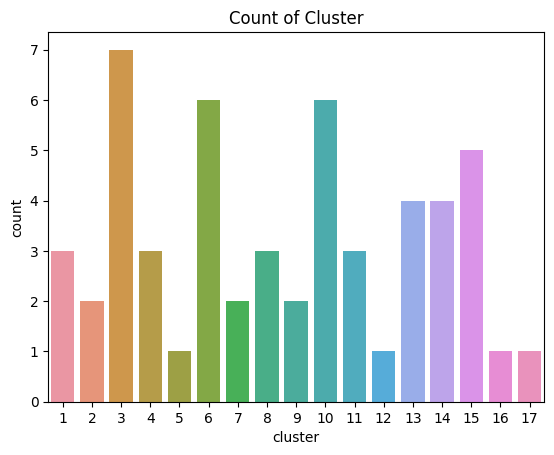

In [108]:
sns.countplot("cluster", data=store)

plt.title("Count of Cluster")

plt.show()


##There are 17 unique clusters with cluster 3 having the highest count

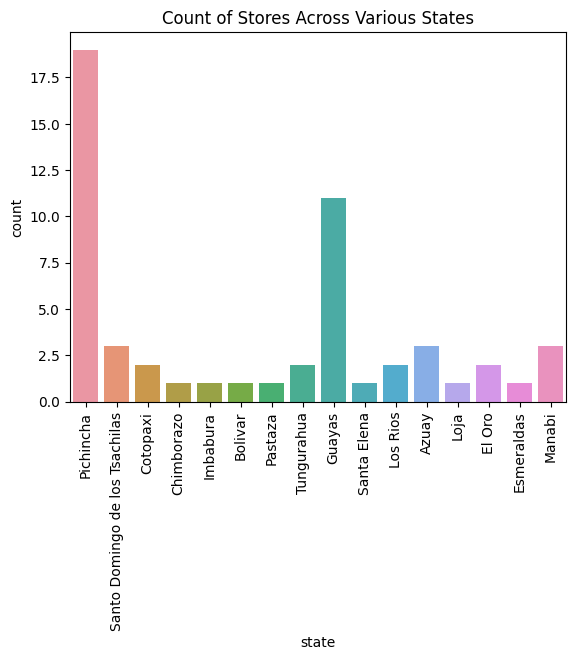

<Figure size 2000x1500 with 0 Axes>

In [109]:
sns.countplot("state", data=store)

plt.title("Count of Stores Across Various States")
plt.xticks(rotation=90)
plt.figure(figsize= (20,15))

plt.show()
##There are 16 unique states with Pichincha having the highest number of stores

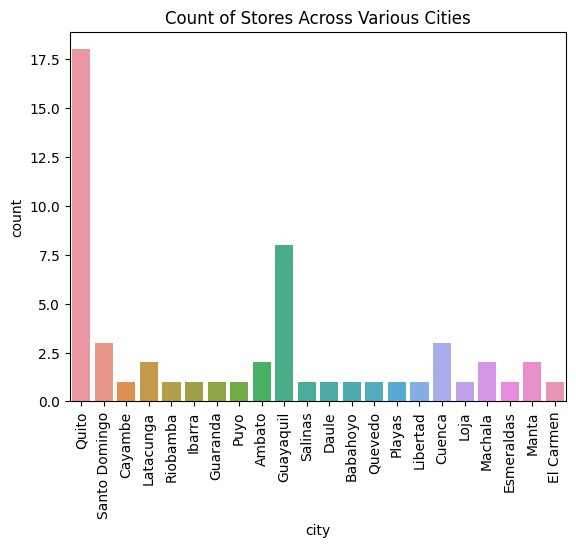

<Figure size 2000x1500 with 0 Axes>

In [110]:
sns.countplot("city", data=store)

plt.title("Count of Stores Across Various Cities")
plt.xticks(rotation=90)
plt.figure(figsize= (20,15))

plt.show()

##store.city.value_counts()
##There are 22 unique cities with Quito having the highest count


In [111]:
len(store.store_nbr.unique())
##There are 54 unique stores

54

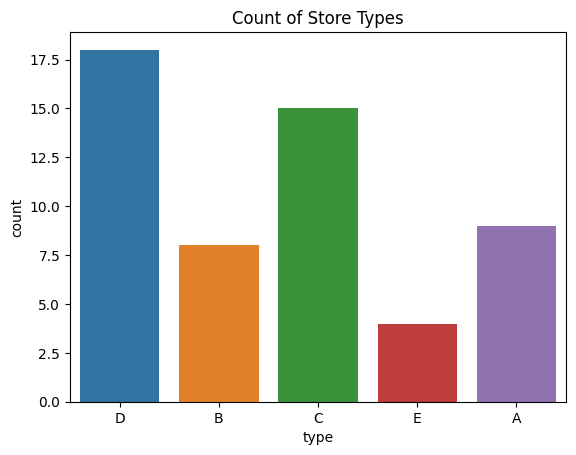

In [112]:
sns.countplot("type", data=store)

plt.title("Count of Store Types")

plt.show()

##5 unique store typeswith store D having the highest count

<Axes: >

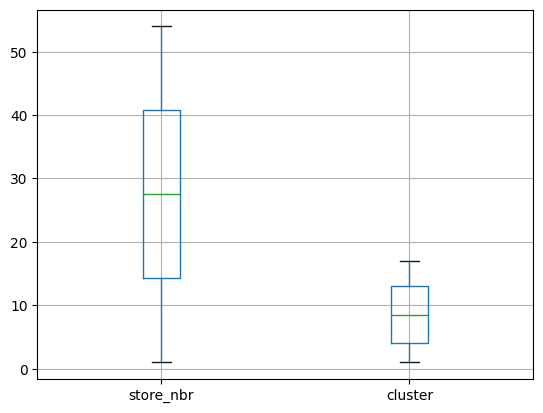

In [113]:
store.boxplot()

In Summary:

    - There are 17 unique clusters with cluster 3 having the highest count
    - There are 16 unique states
    - There are 22 unique cities with Quito having the highest count
    - There are 54 unique stores Across 16 states and 22 cities
    - There are 5 unique store types with stores type D having the highest count

### Exploring the Transaction Dataset

In [114]:
transactions

date  store_nbr  transactions
0     2013-01-01         25           770
1     2013-01-02          1          2111
2     2013-01-02          2          2358
3     2013-01-02          3          3487
4     2013-01-02          4          1922
...          ...        ...           ...
83483 2017-08-15         50          2804
83484 2017-08-15         51          1573
83485 2017-08-15         52          2255
83486 2017-08-15         53           932
83487 2017-08-15         54           802

[83488 rows x 3 columns]

In [115]:
##making a copy just in case we make any mistake 
trans= transactions.copy()

In [116]:
transactions= transactions.set_index("date")

In [117]:
transactions

store_nbr  transactions
date                               
2013-01-01         25           770
2013-01-02          1          2111
2013-01-02          2          2358
2013-01-02          3          3487
2013-01-02          4          1922
...               ...           ...
2017-08-15         50          2804
2017-08-15         51          1573
2017-08-15         52          2255
2017-08-15         53           932
2017-08-15         54           802

[83488 rows x 2 columns]

In [118]:
fig= ex.line(x= transactions.index, y= "transactions", data_frame= transactions)

fig.update_xaxes(rangeslider_visible= True)

fig.show()

<Axes: >

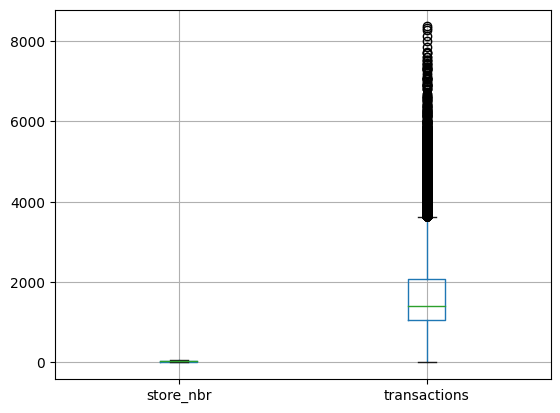

In [119]:
##Let's check for outliers

transactions.boxplot()

<Axes: xlabel='date'>

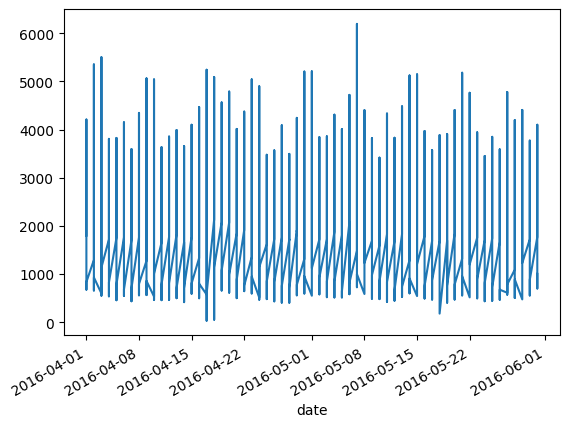

In [120]:
##Let's see how transactions were affected by the earthquake

daily_trans= transactions["transactions"].resample("D").mean()
transactions["transactions"].loc["2016-4":"2016-05"].plot()

Text(0.5, 1.0, 'Top 5 Store with the Highest Transactions')

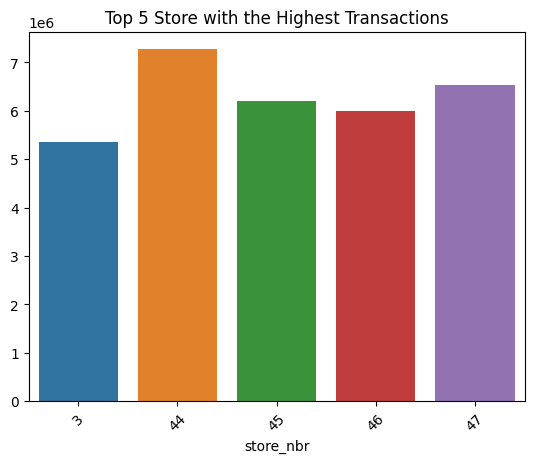

In [121]:
Q3.##let's see which stores had the highest transactions

sto_tran= transactions.groupby("store_nbr")["transactions"].agg("sum").sort_values(ascending= False).head()

sns.barplot(x=sto_tran.index, y=sto_tran.values)

plt.xticks(rotation= 45)
plt.title('Top 5 Store with the Highest Transactions')

Summary of Transaction Dataset:
    
    - The store dataset had some seasonality with a spike in sales on every 23rd of December
    - store number 44 had the highest number of transactions
    - There are some outliers in the transactions
    - No inherent difference in transactions after earthquake

### Exploring the Holidays Dataset

In [122]:
holidays

date        type    locale locale_name  \
0   2012-03-02     Holiday     Local       Manta   
1   2012-04-01     Holiday  Regional    Cotopaxi   
2   2012-04-12     Holiday     Local      Cuenca   
3   2012-04-14     Holiday     Local    Libertad   
4   2012-04-21     Holiday     Local    Riobamba   
..         ...         ...       ...         ...   
345 2017-12-22  Additional  National     Ecuador   
346 2017-12-23  Additional  National     Ecuador   
347 2017-12-24  Additional  National     Ecuador   
348 2017-12-25     Holiday  National     Ecuador   
349 2017-12-26  Additional  National     Ecuador   

                       description  transferred  
0               Fundacion de Manta        False  
1    Provincializacion de Cotopaxi        False  
2              Fundacion de Cuenca        False  
3        Cantonizacion de Libertad        False  
4        Cantonizacion de Riobamba        False  
..                             ...          ...  
345                      Navidad-3        False  
346                      Navidad-2        False  
347                      Navidad-1        False  
348                        Navidad        False  
349                      Navidad+1        False  

[350 rows x 6 columns]

In [123]:
holi= holidays.copy()

In [124]:
type_counts = holi.groupby('type').size().reset_index(name='count')


fig = ex.scatter(type_counts, x='type', y='count', size='count', color= "type", hover_name='type',
                 log_y=False, size_max=60)


fig.show()

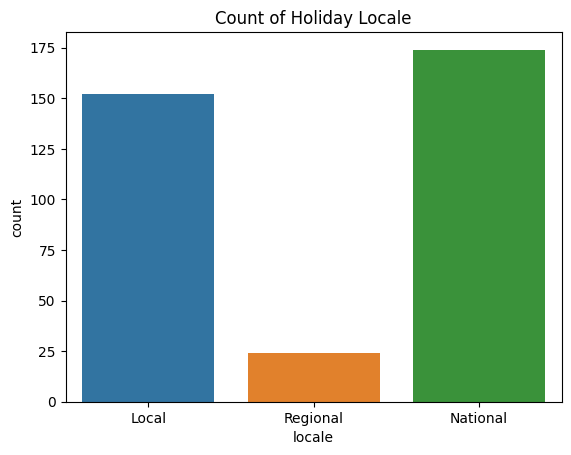

In [125]:
##Let's see which locale has the highest number of holidays

plt.title("Count of Holiday Locale")
sns.countplot("locale", data= holi)
plt.show()

In [126]:
trans_count= holi.groupby("transferred").size().reset_index(name="count")

trans_count


transferred  count
0        False    338
1         True     12

([<matplotlib.patches.Wedge at 0x1b67b32f2e0>,
 [Text(-1.0936251618386073, 0.11825398679740307, 'False'),
  Text(1.0936251576867049, -0.11825402519461974, 'True')])

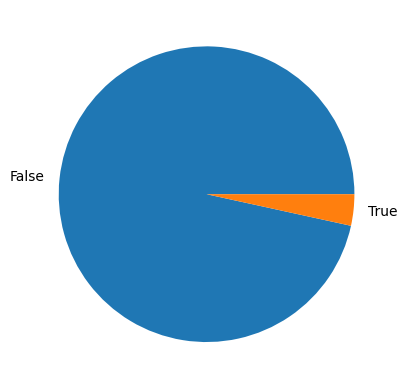

In [127]:
sns.set_color_codes("pastel")

plt.pie(data= trans_count,x= "count", labels= "transferred" )

In [128]:
##We will like to see if the day of the earthquake was a holiday


holi= holi.set_index("date")


In [129]:
holi.loc["2016-04-16":"2016-05-01"]

type    locale locale_name                description  \
date                                                                   
2016-04-16    Event  National     Ecuador           Terremoto Manabi   
2016-04-17    Event  National     Ecuador         Terremoto Manabi+1   
2016-04-18    Event  National     Ecuador         Terremoto Manabi+2   
2016-04-19    Event  National     Ecuador         Terremoto Manabi+3   
2016-04-20    Event  National     Ecuador         Terremoto Manabi+4   
2016-04-21  Holiday     Local    Riobamba  Cantonizacion de Riobamba   
2016-04-21    Event  National     Ecuador         Terremoto Manabi+5   
2016-04-22    Event  National     Ecuador         Terremoto Manabi+6   
2016-04-23    Event  National     Ecuador         Terremoto Manabi+7   
2016-04-24    Event  National     Ecuador         Terremoto Manabi+8   
2016-04-25    Event  National     Ecuador         Terremoto Manabi+9   
2016-04-26    Event  National     Ecuador        Terremoto Manabi+10   
2016-04-27    Event  National     Ecuador        Terremoto Manabi+11   
2016-04-28    Event  National     Ecuador        Terremoto Manabi+12   
2016-04-29    Event  National     Ecuador        Terremoto Manabi+13   
2016-04-30    Event  National     Ecuador        Terremoto Manabi+14   
2016-05-01  Holiday  National     Ecuador            Dia del Trabajo   
2016-05-01    Event  National     Ecuador        Terremoto Manabi+15   

            transferred  
date                     
2016-04-16        False  
2016-04-17        False  
2016-04-18        False  
2016-04-19        False  
2016-04-20        False  
2016-04-21        False  
2016-04-21        False  
2016-04-22        False  
2016-04-23        False  
2016-04-24        False  
2016-04-25        False  
2016-04-26        False  
2016-04-27        False  
2016-04-28        False  
2016-04-29        False  
2016-04-30        False  
2016-05-01        False  
2016-05-01        False

#### Summary of the Holiday Column:

- Most holidays were national holidays
- Most holidays were observed the same day they occured
- Most of the holidays were not transferred except 12 holidays

### Exploring the Oil Dataset

In [130]:
oil

date  dcoilwtico
0    2013-01-01         NaN
1    2013-01-02       93.14
2    2013-01-03       92.97
3    2013-01-04       93.12
4    2013-01-07       93.20
...         ...         ...
1213 2017-08-25       47.65
1214 2017-08-28       46.40
1215 2017-08-29       46.46
1216 2017-08-30       45.96
1217 2017-08-31       47.26

[1218 rows x 2 columns]

In [131]:
oil_1= oil.copy()

In [132]:
oil= oil.set_index("date")

In [133]:
oil

dcoilwtico
date                  
2013-01-01         NaN
2013-01-02       93.14
2013-01-03       92.97
2013-01-04       93.12
2013-01-07       93.20
...                ...
2017-08-25       47.65
2017-08-28       46.40
2017-08-29       46.46
2017-08-30       45.96
2017-08-31       47.26

[1218 rows x 1 columns]

In [134]:
##We know this dataset has missing values, and since the first value is missing, I will use the backfill method 

oil["dcoilwtico"]= oil["dcoilwtico"].fillna(method= "bfill")

oil

dcoilwtico
date                  
2013-01-01       93.14
2013-01-02       93.14
2013-01-03       92.97
2013-01-04       93.12
2013-01-07       93.20
...                ...
2017-08-25       47.65
2017-08-28       46.40
2017-08-29       46.46
2017-08-30       45.96
2017-08-31       47.26

[1218 rows x 1 columns]

<Axes: >

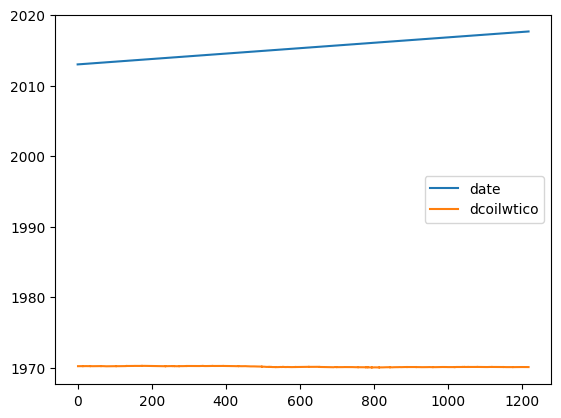

In [135]:
oil_1.plot()

<Axes: xlabel='date'>

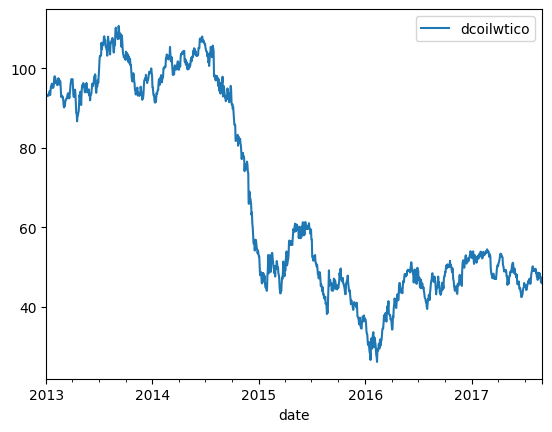

In [136]:
oil.plot()

#### Summary of the oil  dataset:

- There was a price drop from 2014 to 2017, we will see if it affected sales

### Exploring the train dataset

In [137]:
## Creating a copy to ensure we can retrive the orginal dataframe incase of an error during our analysis

train_1= df_train.copy()

In [138]:
train_1=train_1.set_index("date")

In [139]:
train_1

id  store_nbr                      family     sales  \
date                                                                   
2013-01-01        0          1                  AUTOMOTIVE     0.000   
2013-01-01        1          1                   BABY CARE     0.000   
2013-01-01        2          1                      BEAUTY     0.000   
2013-01-01        3          1                   BEVERAGES     0.000   
2013-01-01        4          1                       BOOKS     0.000   
...             ...        ...                         ...       ...   
2017-08-15  3000883          9                     POULTRY   438.133   
2017-08-15  3000884          9              PREPARED FOODS   154.553   
2017-08-15  3000885          9                     PRODUCE  2419.729   
2017-08-15  3000886          9  SCHOOL AND OFFICE SUPPLIES   121.000   
2017-08-15  3000887          9                     SEAFOOD    16.000   

            onpromotion  
date                     
2013-01-01            0  
2013-01-01            0  
2013-01-01            0  
2013-01-01            0  
2013-01-01            0  
...                 ...  
2017-08-15            0  
2017-08-15            1  
2017-08-15          148  
2017-08-15            8  
2017-08-15            0  

[3000888 rows x 5 columns]

#### Univariate Analysis 

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'store_nbr'}>],
       [<Axes: title={'center': 'sales'}>,
        <Axes: title={'center': 'onpromotion'}>]], dtype=object)

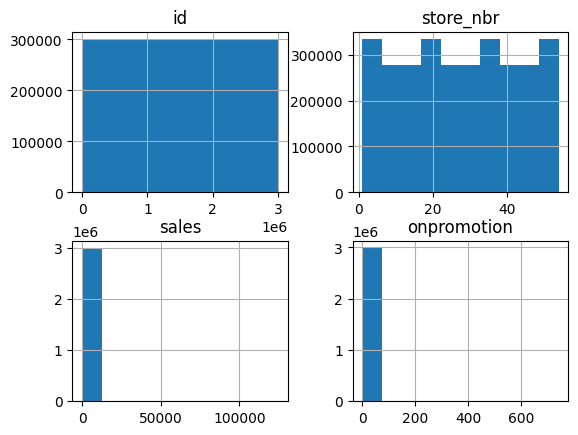

In [140]:
##Checking the distribution of the train dataset

train_1.hist()

<Axes: >

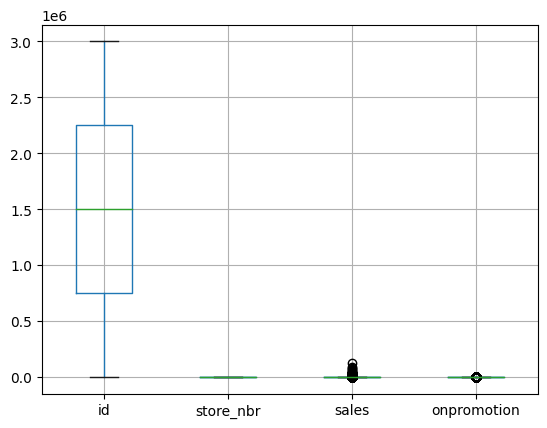

In [141]:
##Checking for outliers

train_1.boxplot()



- There are some outliers in the sales attribute and more in the promotions

In [161]:
##Exploring the family attrubute

family_counts = train_1.groupby('family').size().reset_index(name='count')


fig_1 = ex.scatter(family_counts, x='family', y='count', size='count', color= "family", hover_name='family',
                log_y=False, size_max=60)

fig_1.show()


All the family had the same count, and this makes sense because on days there were no purchases, the family of the product was still include

In [143]:
#### Let's see which family was bought the most  

family_bought= train_1[train_1["sales"]!=0 ]

##Lets group and plot

family_sale = family_bought.groupby('family').size().reset_index(name='count').sort_values(by= "count")


fig_2= ex.scatter(family_sale, x='family', y='count', size='count', color= "family", hover_name='family',
                log_y=False, size_max=60)

fig_2.show()

#### Notes on the Family Attibute

- books where bought less often, bread and bakery had the highest sales


<Axes: xlabel='date'>

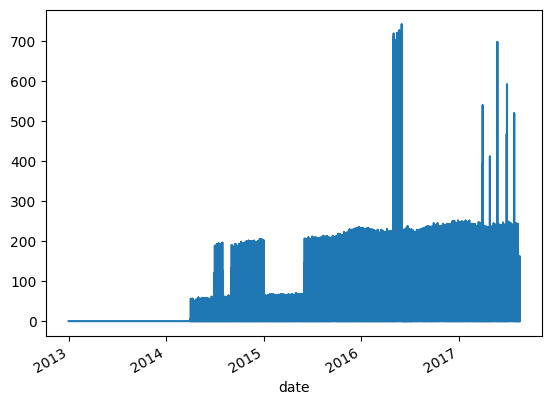

In [144]:
###Exploring the train_1 atttribute

train_1["onpromotion"].plot()

- No promotions were made from 2013 to 2014
- There were increased promotions in 2016;likewise, 2017, and we will investigate that
- There was a drop in promotion withint some months in 2015 and 2014

date
2013-01-31    Axes(0.125,0.2;0.775x0.68)
2013-02-28    Axes(0.125,0.2;0.775x0.68)
2013-03-31    Axes(0.125,0.2;0.775x0.68)
2013-04-30    Axes(0.125,0.2;0.775x0.68)
2013-05-31    Axes(0.125,0.2;0.775x0.68)
2013-06-30    Axes(0.125,0.2;0.775x0.68)
2013-07-31    Axes(0.125,0.2;0.775x0.68)
2013-08-31    Axes(0.125,0.2;0.775x0.68)
2013-09-30    Axes(0.125,0.2;0.775x0.68)
2013-10-31    Axes(0.125,0.2;0.775x0.68)
2013-11-30    Axes(0.125,0.2;0.775x0.68)
2013-12-31    Axes(0.125,0.2;0.775x0.68)
2014-01-31    Axes(0.125,0.2;0.775x0.68)
2014-02-28    Axes(0.125,0.2;0.775x0.68)
2014-03-31    Axes(0.125,0.2;0.775x0.68)
2014-04-30    Axes(0.125,0.2;0.775x0.68)
2014-05-31    Axes(0.125,0.2;0.775x0.68)
2014-06-30    Axes(0.125,0.2;0.775x0.68)
2014-07-31    Axes(0.125,0.2;0.775x0.68)
2014-08-31    Axes(0.125,0.2;0.775x0.68)
2014-09-30    Axes(0.125,0.2;0.775x0.68)
2014-10-31    Axes(0.125,0.2;0.775x0.68)
2014-11-30    Axes(0.125,0.2;0.775x0.68)
2014-12-31    Axes(0.125,0.2;0.775x0.68)
2015-01-31 

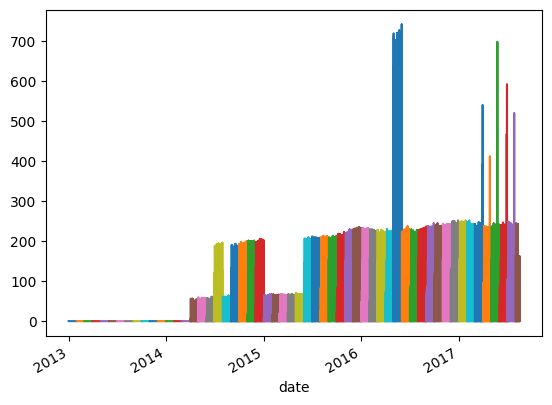

In [145]:
month_promo=train_1["onpromotion"].resample("M")

month_promo.plot()

Notes of promotion after resmapling on promotion by month:
    
    - Promotions were toned down from January to May of 2015
    
    - They increased thier promotions for May of 2016, and we are guessing this is because of the earthquake
    
    - Also, we can see an increase in promotions for some days in march to july of 2017

date
2016-01-31    Axes(0.125,0.2;0.775x0.68)
2016-02-29    Axes(0.125,0.2;0.775x0.68)
2016-03-31    Axes(0.125,0.2;0.775x0.68)
2016-04-30    Axes(0.125,0.2;0.775x0.68)
2016-05-31    Axes(0.125,0.2;0.775x0.68)
2016-06-30    Axes(0.125,0.2;0.775x0.68)
2016-07-31    Axes(0.125,0.2;0.775x0.68)
2016-08-31    Axes(0.125,0.2;0.775x0.68)
2016-09-30    Axes(0.125,0.2;0.775x0.68)
2016-10-31    Axes(0.125,0.2;0.775x0.68)
2016-11-30    Axes(0.125,0.2;0.775x0.68)
2016-12-31    Axes(0.125,0.2;0.775x0.68)
Freq: M, Name: onpromotion, dtype: object

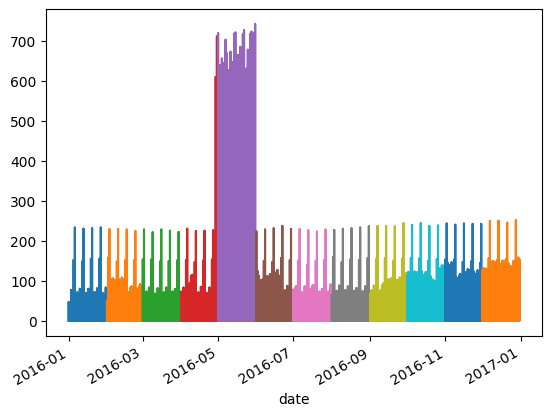

In [146]:
##Due to earthquake, might be interesting to see how promotions were affected in 2016
Month_2016=train_1["onpromotion"].loc["2016"].resample("M")

Month_2016.plot()

- From the graph, onpromotions in 2016 were pretty steady in April
- They increased promotion during the end of April and in May of 2016

date
2016-04-01    Axes(0.125,0.2;0.775x0.68)
2016-04-02    Axes(0.125,0.2;0.775x0.68)
2016-04-03    Axes(0.125,0.2;0.775x0.68)
2016-04-04    Axes(0.125,0.2;0.775x0.68)
2016-04-05    Axes(0.125,0.2;0.775x0.68)
                         ...            
2016-06-26    Axes(0.125,0.2;0.775x0.68)
2016-06-27    Axes(0.125,0.2;0.775x0.68)
2016-06-28    Axes(0.125,0.2;0.775x0.68)
2016-06-29    Axes(0.125,0.2;0.775x0.68)
2016-06-30    Axes(0.125,0.2;0.775x0.68)
Freq: D, Name: onpromotion, Length: 91, dtype: object

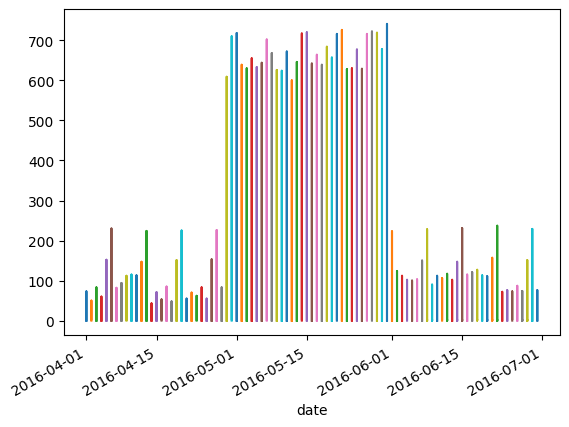

In [147]:
##Let's resample the above data by day to see which days  happened:

train_day=train_1["onpromotion"].loc["2016-04":"2016-06"].resample("D")

train_day.plot()

- Massive promotion was ran from 29th April to 31st May of 2016


<Axes: xlabel='date'>

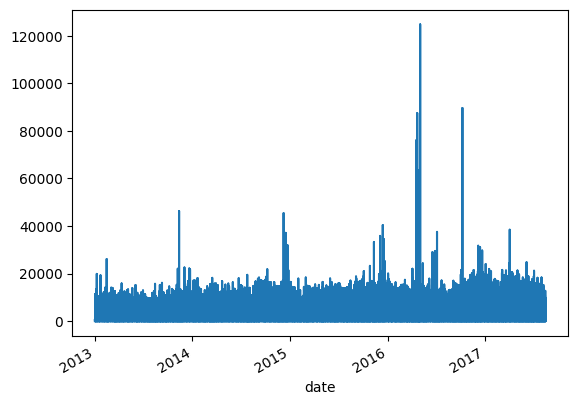

In [148]:
train_1.sales.plot()

#### Summary about on promotions:

- We can see some spikes in sales in 2014, 2015, 2016 (really prominent ones), and 2017 as well

<Axes: xlabel='date'>

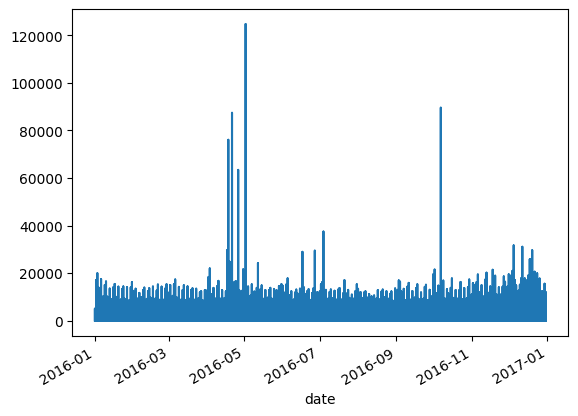

In [149]:
train_1["sales"].loc["2016"].plot()

<Axes: xlabel='date'>

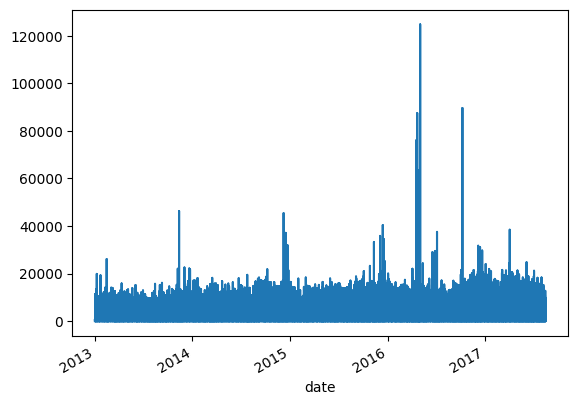

In [150]:
##Exploring the sales dataset

train_1["sales"].plot()

##We can see some sharp increase in sales so, we will investigate that

date
2013-01-31    Axes(0.125,0.2;0.775x0.68)
2013-02-28    Axes(0.125,0.2;0.775x0.68)
2013-03-31    Axes(0.125,0.2;0.775x0.68)
2013-04-30    Axes(0.125,0.2;0.775x0.68)
2013-05-31    Axes(0.125,0.2;0.775x0.68)
2013-06-30    Axes(0.125,0.2;0.775x0.68)
2013-07-31    Axes(0.125,0.2;0.775x0.68)
2013-08-31    Axes(0.125,0.2;0.775x0.68)
2013-09-30    Axes(0.125,0.2;0.775x0.68)
2013-10-31    Axes(0.125,0.2;0.775x0.68)
2013-11-30    Axes(0.125,0.2;0.775x0.68)
2013-12-31    Axes(0.125,0.2;0.775x0.68)
2014-01-31    Axes(0.125,0.2;0.775x0.68)
2014-02-28    Axes(0.125,0.2;0.775x0.68)
2014-03-31    Axes(0.125,0.2;0.775x0.68)
2014-04-30    Axes(0.125,0.2;0.775x0.68)
2014-05-31    Axes(0.125,0.2;0.775x0.68)
2014-06-30    Axes(0.125,0.2;0.775x0.68)
2014-07-31    Axes(0.125,0.2;0.775x0.68)
2014-08-31    Axes(0.125,0.2;0.775x0.68)
2014-09-30    Axes(0.125,0.2;0.775x0.68)
2014-10-31    Axes(0.125,0.2;0.775x0.68)
2014-11-30    Axes(0.125,0.2;0.775x0.68)
2014-12-31    Axes(0.125,0.2;0.775x0.68)
2015-01-31 

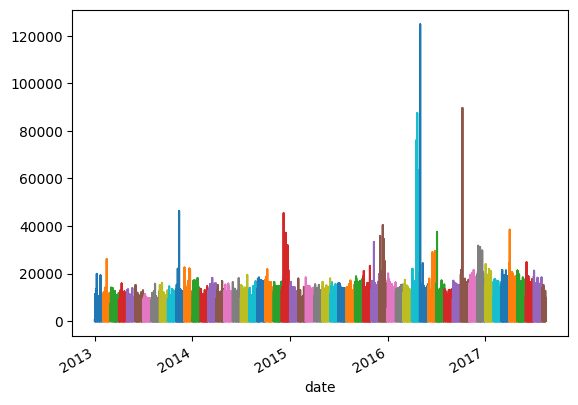

In [151]:
sale__month=train_1["sales"].resample("M")

sale__month.plot()

- There were sharp sales (seasonality) in December of each year and this is probably due to the festive season

- There was an anormaly (increase) in sales during April, May and October of 2016

In [172]:
sales_sum=df_train.groupby(by= "date").agg({"sales": "sum"})

fig_3= ex.line(sales_sum, x= sales_sum.index, y= "sales", title= "Aggregated Sales With Slider")
  
fig_3.update_xaxes(rangeslider_visible= True, 
                 rangeselector= dict(
                     
                     buttons= list([
                         
                         dict(count= 1, label= "1y", step= "year", stepmode= "backward"), 
                         dict(count= 2, label= "2y", step= "year", stepmode= "backward"), 
                         dict(count= 3, label= "3y", step= "year", stepmode= "backward"),
                         dict(step="all")
                         
                     ])
                 
                 )
                
                
                )

fig_3.show()


### multivariate

<Axes: >

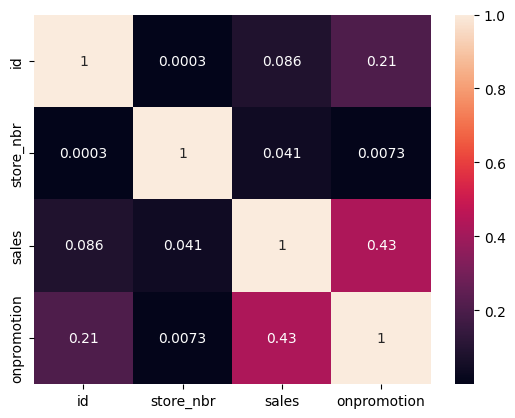

In [153]:
sns.heatmap(train_1.corr(), annot= True)

### Answering Questions


Q1.which city had the highest stores

Q2.which month did we have the highest sale

Q3.which store had the highest transaction?

Q4.which store had the highest sale?

Q5what is the most bought product?

### Q1.which city had the highest stores
    


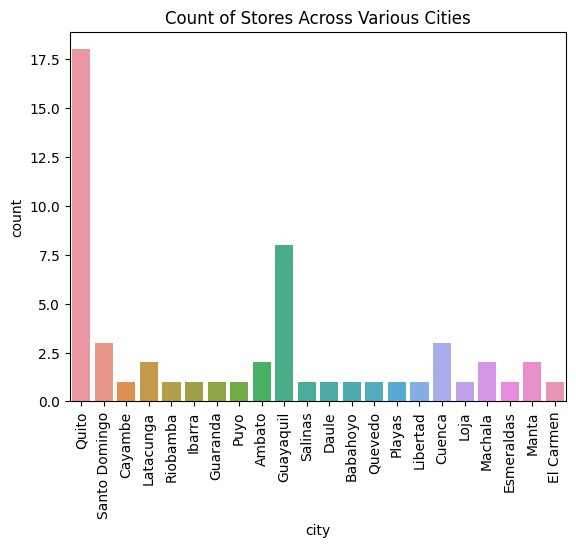

<Figure size 2000x1500 with 0 Axes>

In [163]:
## Ans: From our analysis, we realized that Quilto had the highest number of sale

sns.countplot("city", data=store)

plt.title("Count of Stores Across Various Cities")
plt.xticks(rotation=90)
plt.figure(figsize= (20,15))

plt.show()

Q2.which month did we have the highest sale

Ans: The highest sale (per unit product sold) was recorded in May of 2016
    
    

### Q3.which store had the highest transaction?



Text(0.5, 1.0, 'Top 5 Store with the Highest Transactions')

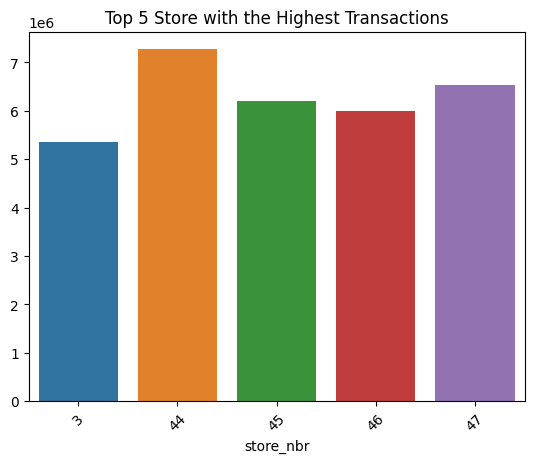

In [162]:
sto_tran= transactions.groupby("store_nbr")["transactions"].agg("sum").sort_values(ascending= False).head()

sns.barplot(x=sto_tran.index, y=sto_tran.values)

plt.xticks(rotation= 45)
plt.title('Top 5 Store with the Highest Transactions')

### Q4.which store had the highest sale?

Text(0.5, 1.0, 'Top 5 Store with the Highest Sale')

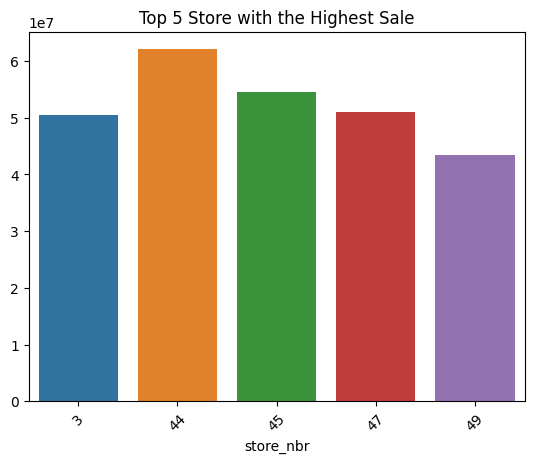

In [171]:
sto_sale= train_1.groupby("store_nbr")["sales"].agg("sum").sort_values(ascending= False).head()

sns.barplot(x=sto_sale.index, y=sto_sale.values)


plt.xticks(rotation= 45)
plt.title('Top 5 Store with the Highest Sale')

### Q5.what is the most bought product per unit sale?

In [164]:
family_bought= train_1[train_1["sales"]!=0 ]

##Lets group and plot

family_sale = family_bought.groupby('family').size().reset_index(name='count').sort_values(by= "count")


fig_2= ex.scatter(family_sale, x='family', y='count', size='count', color= "family", hover_name='family',
                log_y=False, size_max=60)

fig_2.show()

In [ ]:
### Next Step:

- Perform a causality test to see how the other dataset is affecting our sales to choose the best features from each dataset
- Perform some feature 
- Use SARIMAX, VAR, LSTM, XGBOOST for our modelling

## Feature Selection and Importance

As we have observed, there are some other datasets, which features of the dataset relate with our sales, to give us an informed idea of which features to merge and which ones to ignore.  For this we will be using the granger causality test

- We will like to see how transactions, and oil price affect sales
- We will also like to see how holidays affect sales



In [154]:
transac= pd.DataFrame(transactions["transactions"])



transactions
date                    
2013-01-01           770
2013-01-02         93215
2013-01-03         78504
2013-01-04         78494
2013-01-05         93573
...                  ...
2017-08-11         89551
2017-08-12         89927
2017-08-13         85993
2017-08-14         85448
2017-08-15         86561

[1682 rows x 1 columns]

In [155]:
oil

dcoilwtico
date                  
2013-01-01       93.14
2013-01-02       93.14
2013-01-03       92.97
2013-01-04       93.12
2013-01-07       93.20
...                ...
2017-08-25       47.65
2017-08-28       46.40
2017-08-29       46.46
2017-08-30       45.96
2017-08-31       47.26

[1218 rows x 1 columns]

In [156]:
##we will filter out only our sales column from the train dataset

sales_train= pd.DataFrame(train_1["sales"])

Sale= sales_train.groupby(by= "date").agg({"sales": "sum"})

Sale

sales
date                     
2013-01-01    2511.618999
2013-01-02  496092.417944
2013-01-03  361461.231124
2013-01-04  354459.677093
2013-01-05  477350.121229
...                   ...
2017-08-11  826373.722022
2017-08-12  792630.535079
2017-08-13  865639.677471
2017-08-14  760922.406081
2017-08-15  762661.935939

[1684 rows x 1 columns]

In [157]:
##Let's merge them

merged_df = Sale.merge(trans, how='outer', left_index=True, right_index=True)
merged_df = merged_df.merge(oil, how='outer', left_index=True, right_index=True)


In [158]:
merged_df

sales  transactions  dcoilwtico
date                                               
2013-01-01    2511.618999         770.0       93.14
2013-01-02  496092.417944       93215.0       93.14
2013-01-03  361461.231124       78504.0       92.97
2013-01-04  354459.677093       78494.0       93.12
2013-01-05  477350.121229       93573.0         NaN
...                   ...           ...         ...
2017-08-25            NaN           NaN       47.65
2017-08-28            NaN           NaN       46.40
2017-08-29            NaN           NaN       46.46
2017-08-30            NaN           NaN       45.96
2017-08-31            NaN           NaN       47.26

[1699 rows x 3 columns]